# Склейка изображений

In [24]:
%matplotlib inline

In [25]:
import cv2
import numpy as np
import sys
import matplotlib.pyplot as plt

In [26]:
def image_merging (A, B):
    # Гауссовская пирамида для изображения А
    G = A.copy()
    gpA = [G]
    for i in range(5):
        G = cv2.pyrDown(G)
        gpA.append(G)

    # Гауссовская пирамида для изображения В
    G = B.copy()
    gpB = [G]
    for i in range(5):
        G = cv2.pyrDown(G)
        gpB.append(G)

    # Лаплассовская пирамида для изображения A
    lpA = [gpA[5]]
    for i in range(5,0,-1):
        GE = cv2.pyrUp(gpA[i])
        L = cv2.subtract(gpA[i-1],GE)
        lpA.append(L)

    # Лаплассовская пирамида для изображения В
    lpB = [gpB[5]]
    for i in range(5,0,-1):
        GE = cv2.pyrUp(gpB[i])
        L = cv2.subtract(gpB[i-1],GE)
        lpB.append(L)

    # Сращивание изображений
    LS = []
    for la,lb in zip(lpA,lpB):
        rows,cols,dpt = la.shape
        ls = np.hstack((la[:, 0: int(cols/2)], lb[:, int(cols/2) :]))
        LS.append(ls)

    # Восстановление единого изображения
    ls_ = LS[0]
    for i in range(1,6):
        ls_ = cv2.pyrUp(ls_)
        ls_ = cv2.add(ls_, LS[i])

    # Прямое слияние изображений
    real = np.hstack((A[:, :int(cols/2)],B[:, int(cols/2):]))
    return real, ls_

In [27]:
image1 = cv2.imread('Apple.png', 3)
A = cv2.resize(image1, (448, 448), interpolation=cv2.INTER_CUBIC)
image2 = cv2.imread('Orange.png', 3)
B = cv2.resize(image2, (448, 448), interpolation=cv2.INTER_CUBIC)
direct_merged, lapl_merge = image_merging(A, B)

Text(0.5, 1.0, 'Прямое слияние')

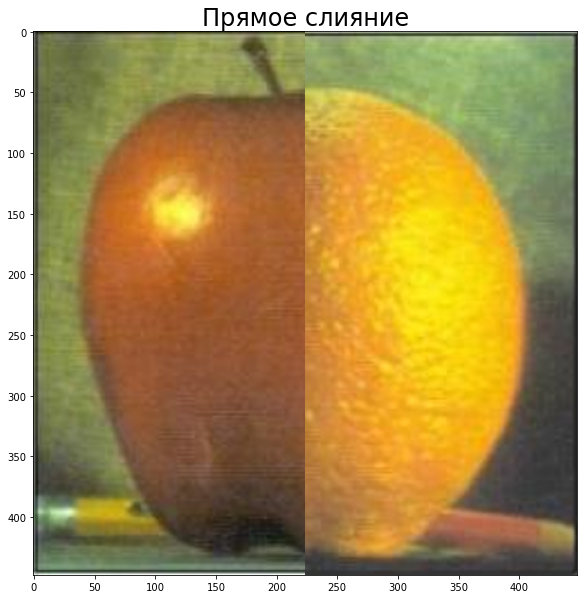

In [28]:
plt.figure(figsize=(10,10))
plt.imshow(cv2.cvtColor(direct_merged, cv2.COLOR_BGR2RGB))
plt.title('Прямое слияние', fontsize=24)

Text(0.5, 1.0, 'Слияние с помощью пирамид')

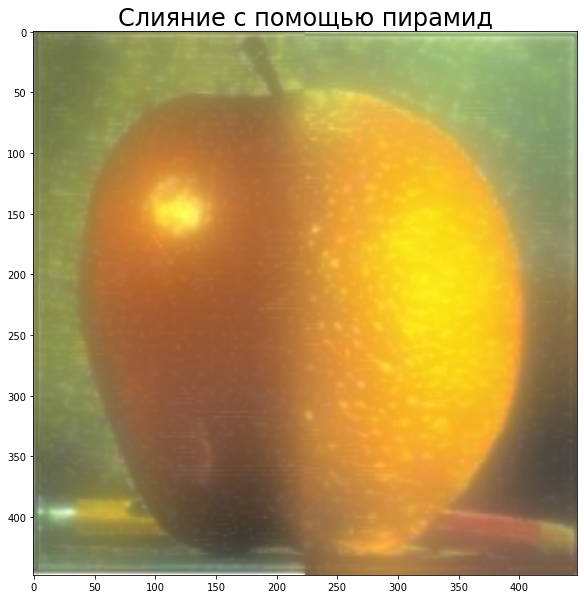

In [29]:
plt.figure(figsize=(10,10))
plt.imshow(cv2.cvtColor(lapl_merge, cv2.COLOR_BGR2RGB))
plt.title('Слияние с помощью пирамид', fontsize=24)